In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
class N():
    pass

tf.reset_default_graph()

model = N()
model.x = tf.placeholder(tf.float32, (None, 28, 28, 1))
model.ref = tf.placeholder(tf.float32, (None, 10))
model.L1 = tf.layers.conv2d(inputs=model.x, filters=3, kernel_size=(5,5), padding='same', name='conv2d')
model.L2 = tf.layers.max_pooling2d(inputs=model.L1, pool_size=(5, 5), strides=(5,5))
model.L3 = tf.reshape(model.L2, (-1, 5*5*3))
model.L4 = tf.layers.dense(inputs=model.L3, units=10)
model.y = model.L4
model.err = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=model.ref, logits=model.y))

In [21]:
def feed(model, im=None):
    if im is not None:
        return {model.x: np.asarray([im]).reshape(-1, 28, 28, 1)}
    else:
        images, labels = mnist.train.next_batch(100)
        return {model.x: images.reshape(-1, 28, 28, 1), model.ref: labels}

In [10]:
rate = 0.5
s = tf.Session()
optimizer = tf.train.GradientDescentOptimizer(rate).minimize(model.err)
s.run(tf.global_variables_initializer())
s.run(model.err, feed(model))

2.2861021

In [11]:
data = feed(model)
for i in range(100):
    s.run(optimizer, data)
    if i % 10 == 0:
        print "%.4f" % s.run(model.err, data)
print "Done"

2.1839
1.0940
0.4456
0.1746
0.1420
0.0698
0.0380
0.0260
0.0196
0.0156
Done


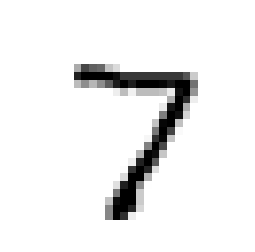

In [18]:
im = mnist.test.images[0].reshape(28, 28)
pl.imshow(im, cmap='gray_r');
pl.axis('off');

In [22]:
y = s.run(model.y, feed(model, im))

In [30]:
sorted(enumerate(y.reshape(-1)), key=lambda x: x[-1], reverse=1)

[(7, 11.353979),
 (9, 3.3661587),
 (3, 2.6594298),
 (1, 1.7477473),
 (4, 0.34729218),
 (5, -1.6936768),
 (8, -2.2801325),
 (0, -4.907208),
 (2, -6.322309),
 (6, -7.0889144)]

In [37]:
kernel_variable = [v for v in tf.trainable_variables() if v.name == 'conv2d/kernel:0'][0]
kernel = np.squeeze(s.run(kernel_variable))
kernel.shape

(5, 5, 3)

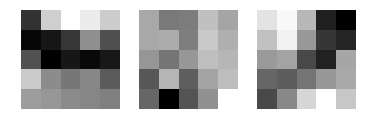

In [41]:
for i in range(3):
    pl.subplot(1,3,i+1)
    pl.imshow(kernel[:,:,i], cmap='gray_r');
    pl.axis('off');